In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
from numpy import nan

url = 'https://raw.githubusercontent.com/colettegabriel/capstone_1/master/styles.csv'
data_file = requests.get(url).content
df = pd.read_csv(io.StringIO(data_file.decode('utf-8')))
df['reduction'] = np.where(df['price_disc'] < df['price_us'], df['price_us']-df['price_disc'], np.nan)
pd.options.mode.chained_assignment = None

In [8]:
df.head(10)

,id,price,price_us,discountedPrice,price_disc,gender,masterCategory,subCategory,subcat_2,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 15,Unnamed: 16,reduction
0,43230.0,95.0,1.33,80,1.12,Unisex,Accessories,Accessories,NaN,Key chain,Black,Winter,2015.0,Casual,Wildcraft Unisex Black & Grey Carabiner Key Chain,NaN,NaN,0.21
1,52831.0,95.0,1.33,95,1.33,Women,Accessories,Jewellery,NaN,Earrings,White,Summer,2012.0,Casual,Adrika White Earrings,NaN,NaN,NaN
2,18800.0,99.0,1.39,80,1.12,Unisex,Accessories,Bags,bags,Backpacks,Navy Blue,Summer,2011.0,Casual,Peter England Unisex Casual Navy Blue Backpack,NaN,NaN,0.27
3,15784.0,99.0,1.39,99,1.39,Men,Apparel,Innerwear,NaN,Briefs,Brown,Summer,2016.0,Casual,Facit Men Brown Comfort Briefs,NaN,NaN,NaN
4,15790.0,99.0,1.39,99,1.39,Men,Apparel,Innerwear,NaN,Briefs,Green,Summer,2016.0,Casual,Facit Men Green Comfort Briefs,NaN,NaN,NaN
5,15797.0,99.0,1.39,99,1.39,Men,Apparel,Innerwear,NaN,Briefs,White,Summer,2016.0,Casual,Facit Men White Comfort Briefs,NaN,NaN,NaN
6,32170.0,99.0,1.39,99,1.39,Women,Accessories,Socks,NaN,Socks,Pink,Summer,2017.0,Casual,Playboy Women Pink Socks,NaN,NaN,NaN
7,47522.0,99.0,1.39,99,1.39,Men,Apparel,Innerwear,NaN,Briefs,Khaki,Summer,2016.0,Casual,Facit Men Khaki Breif,NaN,NaN,NaN
8,47525.0,99.0,1.39,99,1.39,Men,Apparel,Innerwear,NaN,Briefs,Blue,Summer,2016.0,Casual,Facit Men Blue Brief,NaN,NaN,NaN
9,32171.0,99.0,1.39,99,1.39,Women,Accessories,Socks,NaN,Socks,Blue,Summer,2017.0,Casual,Playboy Women Blue Socks,NaN,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x1a277f7588>,
 'caps': [<matplotlib.lines.Line2D at 0x1a277f7a20>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1a277f7320>,
 'medians': [<matplotlib.lines.Line2D at 0x1a278020f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a27802438>,
 'means': []}

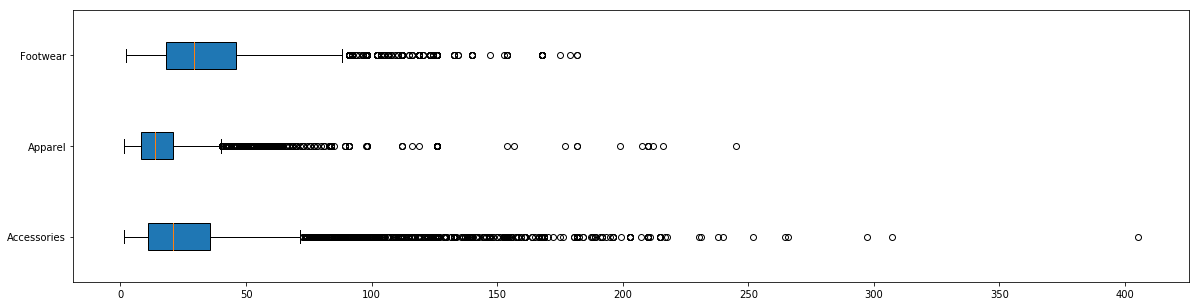

In [6]:
def price_filter(df, category, cat_filter, price):
    price_filter = df.loc[df[category]== cat_filter][price]
    return price_filter

x = price_filter(df,'masterCategory','Accessories','price_us')
y = price_filter(df,'masterCategory','Apparel','price_us')
z = price_filter(df,'masterCategory','Footwear','price_us')


plt.figure(figsize=(20,5))
box_plot_data = [x,y,z]
plt.boxplot(box_plot_data, patch_artist=True, vert=False, labels=['Accessories', 'Apparel', 'Footwear'])

Text(0.5, 1.0, 'Multiple Regression Lines: Price range by Category over time')

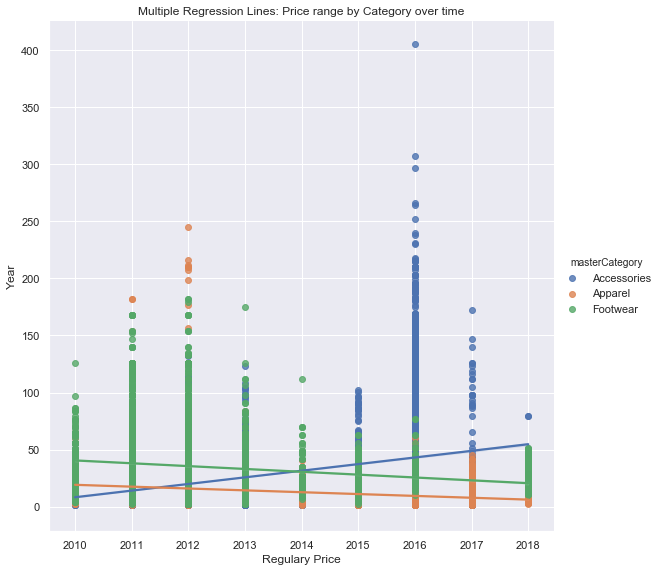

In [56]:
sns.set()

#Multiple linear regression price over year
g = sns.lmplot(x='year', y='price_us', hue='masterCategory',
               truncate=True, height=8, data=df)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Regulary Price", "Year")
plt.title('Multiple Regression Lines: Price range by Category over time')


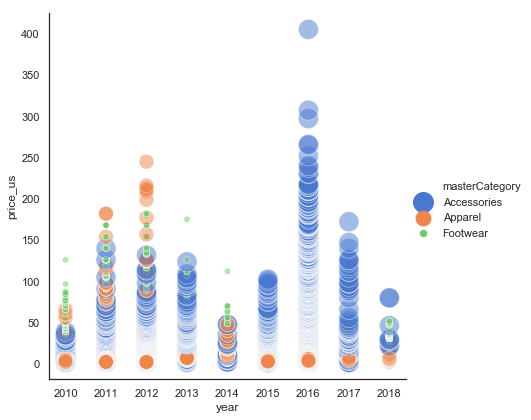

In [20]:
sns.set(style="white")

# Plot price over year
sns.relplot(x="year", y="price_us", hue="masterCategory", size="masterCategory",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

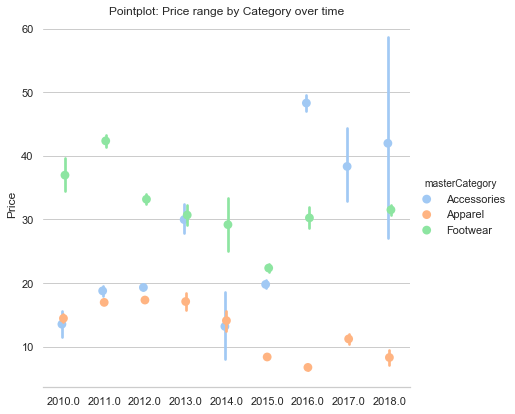

In [54]:
sns.set(style="whitegrid")

g = sns.factorplot(x="year", y="price_us", hue="masterCategory", data=df,
                   height=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Price")
g.set_xlabels("")
plt.title('Pointplot: Price range by Category over time')
plt.show()

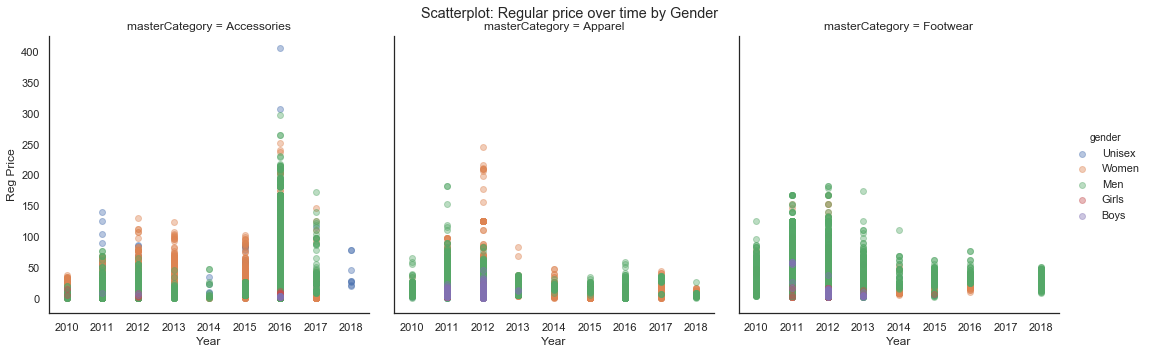

In [64]:
sns.set(style="white")

g = sns.lmplot(y='price_us', 
               x='year',
               hue='gender',
               data=df, # Data.
               col='masterCategory',
               fit_reg=False,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Reg Price")
g.set_xlabels("Year")
plt.suptitle('Scatterplot: Regular price over time by Gender')
plt.subplots_adjust(top=0.9)
plt.show()


Text(0.5, 0.98, 'Histogram with KDE: Regular Price')

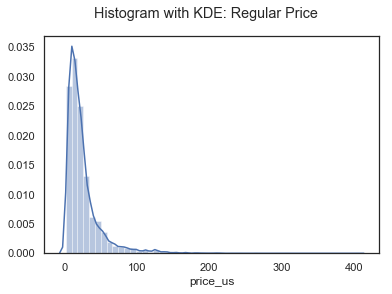

In [69]:
sns.distplot(df['price_us']);
plt.suptitle('Histogram with KDE: Regular Price')

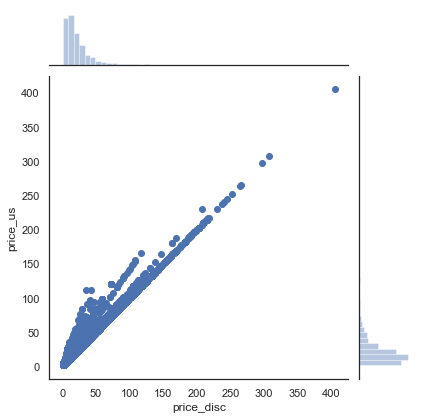

In [75]:
sns.set(style="white")

g = sns.jointplot(x="price_disc", y="price_us", data=df)
plt.show()